In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 
from pathlib import Path 
from matplotlib.pylab import plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
#READING DATA FROM WHALE FILE AND CALCULATING DAILY RETURN
whale_df = pd.read_csv(r"C:\Users\youss\FinTech\utor-tor-fin-pt-11-2020-u-c\whale_returns.csv", index_col = 'Date',  infer_datetime_format= True , parse_dates= True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# COUNT NULLS
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# DROPPIN NULLS
whale_df.dropna(inplace = True)
whale_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [5]:
#READING THE ALGO FILE AND CALCULATING DAILY RETURNS 
algo_df = pd.read_csv(r"C:\Users\youss\FinTech\utor-tor-fin-pt-11-2020-u-c\algo_returns.csv", index_col = 'Date', infer_datetime_format= True, parse_dates= True)
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
#DROPPING NULLS
algo_df.dropna(inplace = True)


In [7]:
#READING THE SP500 File

sp500_df= pd.read_csv(r"C:\Users\youss\FinTech\utor-tor-fin-pt-11-2020-u-c\sp500_history.csv", index_col = 'Date' ,  infer_datetime_format= True , parse_dates= True)
sp500_df.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [8]:
# REPLACING THE SPECIAL CHARACTER 
sp500_df['Close'] = sp500_df['Close'].str.replace('$',"")

In [9]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [10]:
#CONVERTING THE DATA TYPE
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [11]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [12]:
#CALCULATING THE DAILY RETURNS
sp500_df['SP500'] = sp500_df['Close'].pct_change()

In [13]:
sp500_df.head()

,Close,SP500
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-0.008764
2019-04-18,2905.03,-0.001011
2019-04-17,2900.45,-0.001577
2019-04-16,2907.06,0.002279


In [14]:
del sp500_df['Close']

In [15]:
sp500_df.dropna(inplace = True)

In [16]:
#MERGING DATA FRAMES
returns_df = pd.concat([whale_df , algo_df , sp500_df], axis = 1 , join = 'inner' , sort = True)
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


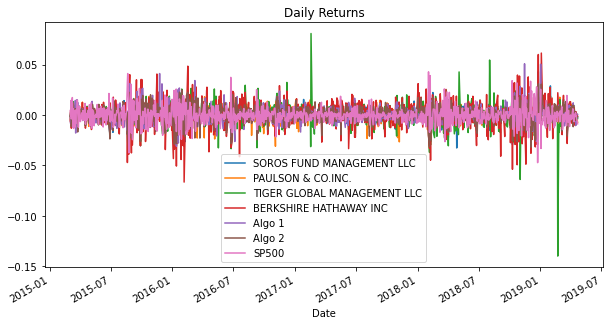

In [17]:
# Plot daily returns of all portfolios
returns_df.plot(title = 'Daily Returns', figsize= (10,5))


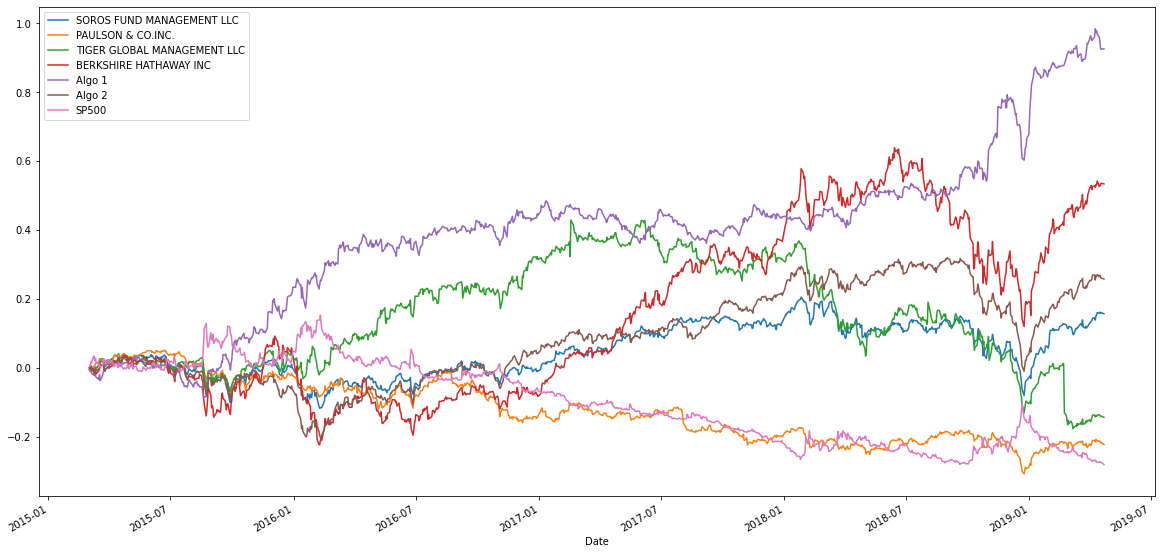

In [18]:
#CALCULATING AND PLOTTING CUMULATIVE RETURNS
cumulative_return = ((1+returns_df).cumprod() -1).plot(figsize = (20 ,10))


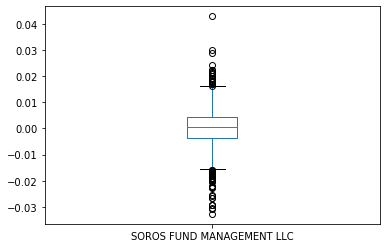

In [19]:
#MAKING A BOX PLOT FOR EACH PORTFOLIO
returns_df['SOROS FUND MANAGEMENT LLC'].plot(kind = 'box')

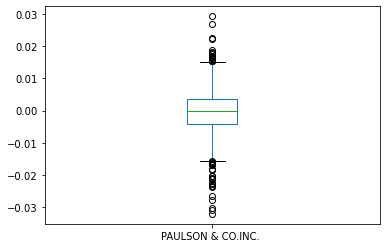

In [20]:
returns_df['PAULSON & CO.INC. '].plot(kind = 'box')

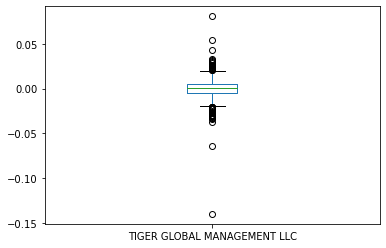

In [21]:
returns_df['TIGER GLOBAL MANAGEMENT LLC'].plot(kind= 'box')

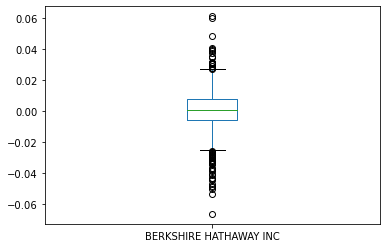

In [22]:
returns_df['BERKSHIRE HATHAWAY INC'].plot(kind = 'box')

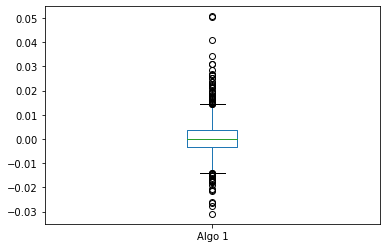

In [23]:
returns_df['Algo 1'].plot(kind = 'box')

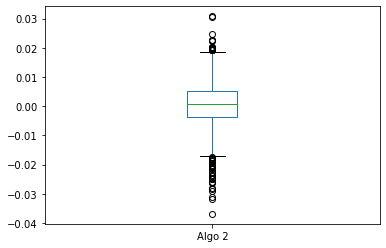

In [24]:
returns_df['Algo 2'].plot(kind = 'box')

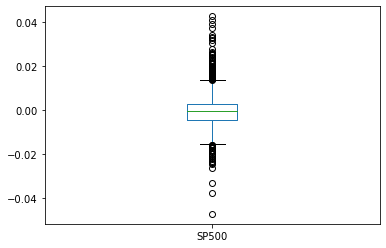

In [25]:
returns_df['SP500'].plot(kind = 'box')

In [26]:
#CALCULATING THE DAILY STANDARD DEVIATION FOR ALL PORTFOLIOS
standard_deviation = returns_df.std()
standard_deviation


SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

In [27]:
print('Berkshire Hathaway and Tiger GLobal Management are riskier than the SP500')

Berkshire Hathaway and Tiger GLobal Management are riskier than the SP500


In [28]:
# ANNUALIZED STANDARD DEVIATION FOR PORTFOLIOS
annualized = returns_df.std()* np.sqrt(252)
annualized

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

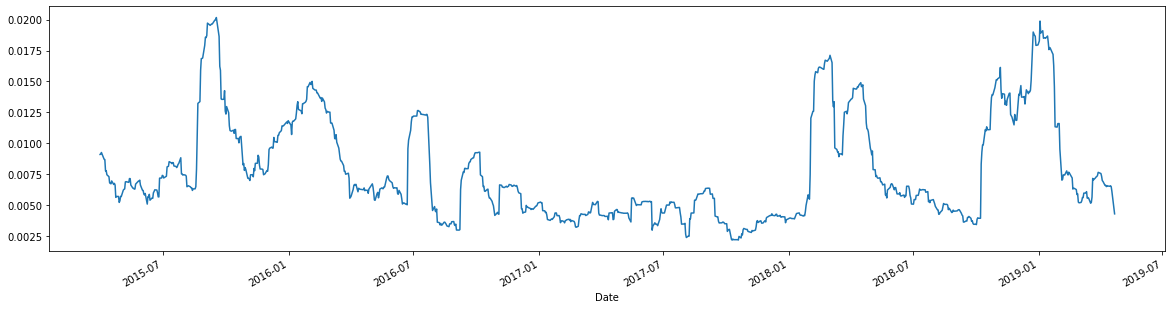

In [29]:
#CALCULATING THE ROLLING STD FOR THE SP500
rolling_sp500 = returns_df['SP500'].rolling(window = 21).std()
rolling_sp500.plot(figsize=(20,5))

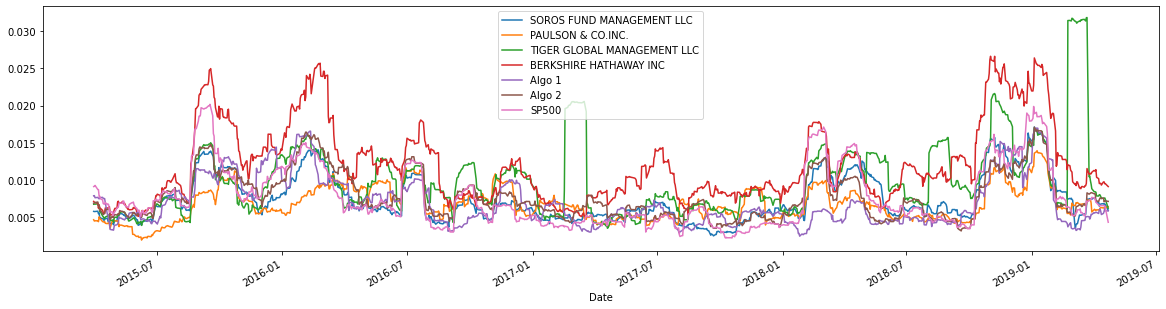

In [30]:
#CALCULATING AND PLOTTING STD FOR ALL PORTFOLIOS
rolling_21_std = returns_df.rolling(window = 21).std()
rolling_21_std.plot(figsize=(20,5))


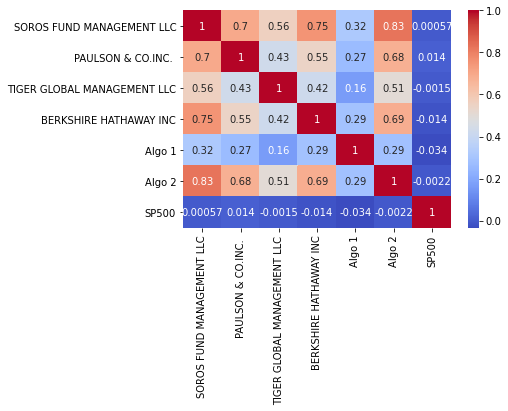

In [31]:
#CALCUALTING THE CORRLEATION FOR THE PORTFOLIOS
portfolio_corelation = returns_df.corr()
sns.heatmap(portfolio_corelation, annot= True, cmap='coolwarm')

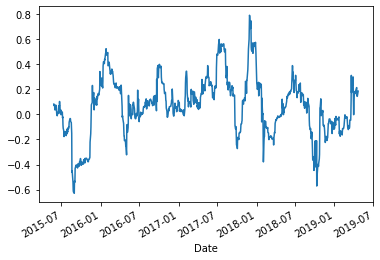

In [32]:
# I CHOSE BERKSHIRE HATHAWY AND I CALCULATING THR ROLLING BETA BETWEEN IT AND THE SP500
rolling_cov_berk_sp500 = returns_df['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(returns_df['SP500'])
variance_b = returns_df['SP500'].rolling(window = 60).var()
rolling_berkshire_beta =  rolling_cov_berk_sp500/ variance_b
rolling_berkshire_beta.plot()


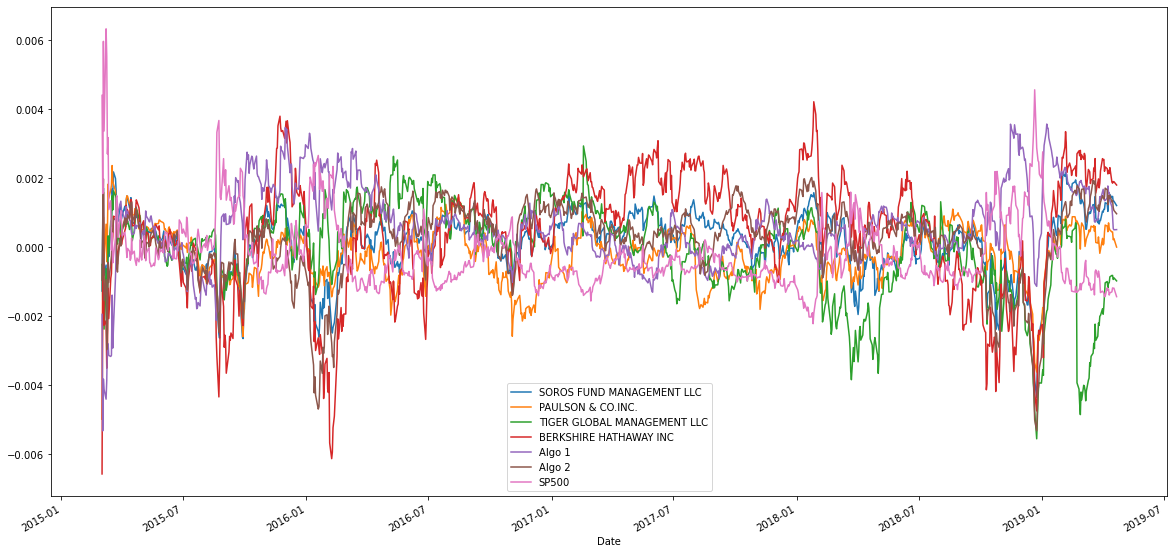

In [33]:
#EWM ROLLING RETURNS
ewm_returns = returns_df.ewm(halflife= 21).mean()
ewm_returns.plot(figsize= (20,10))

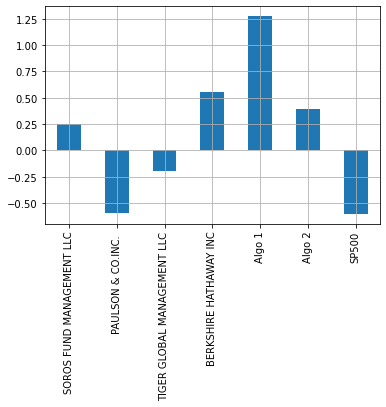

In [34]:
#CALCULATING THR SHARPE RATIO USING THE 10 YR TREASURY BILL AS THE RISK FREE RATE
sharpe_ratio = ((returns_df.mean()*252) - 0.0115)/annualized
sharpe_ratio.plot(kind='bar' , grid = True)

In [35]:
#PART2
#CUSTOM PORTFOLIO
import pandas_datareader as pdr

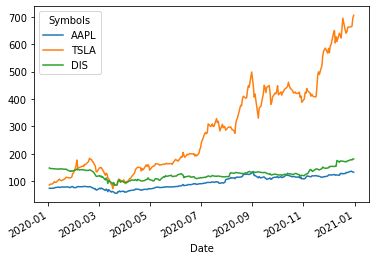

In [36]:
#I CHOSE 3 STOCKS AND GOT THEIR DATA FOR THE PAST YEAR
tickers = ['AAPL', 'TSLA' , 'DIS']
start = dt.date(2020,1,1)
end = dt.date(2021,1,1)
prices = pdr.data.get_data_yahoo(tickers, start , end)['Adj Close']
prices.plot()

In [37]:
prices

Symbols,AAPL,TSLA,DIS
Date,,,
2020-01-02,74.444603,86.052002,148.199997
2020-01-03,73.720840,88.601997,146.500000
2020-01-06,74.308266,90.307999,145.649994
2020-01-07,73.958794,93.811996,145.699997
2020-01-08,75.148521,98.428001,145.399994
...,...,...,...
2020-12-24,131.970001,661.770020,173.729996
2020-12-28,136.690002,663.690002,178.860001
2020-12-29,134.869995,665.989990,177.300003


In [38]:
# I USED THE SP500 AS THE BENCHMARK 
tickers = ['^GSPC']
start = dt.date(2020,1,1)
end = dt.date(2021,1,1)
sp500_prices = pdr.data.get_data_yahoo(tickers, start , end)['Adj Close']
sp500_daily_returns = sp500_prices.pct_change()
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

Symbols,^GSPC
Date,
2020-01-03,-0.007060
2020-01-06,0.003533
2020-01-07,-0.002803
2020-01-08,0.004902
2020-01-09,0.006655


In [39]:
#CALCULATING THE DAILY RETURNS FOR THE CUSTOM PORTFOLIO
daily_returns = prices.pct_change()
daily_returns.dropna(inplace = True)

In [40]:
#CALCULATING THE WEIGHTED RETURNS FOR THE PORTFOLIO
weights = {'AAPL': 0.333, 'TSLA': 0.333, 'DIS':0.333}
weighted_returns = (weights * daily_returns)
weighted_returns.dropna(inplace = True)
portfolio_returns = weighted_returns.sum(axis=1)
weighted_returns

Symbols,AAPL,TSLA,DIS
Date,,,
2020-01-03,-0.003237,0.009868,-0.003820
2020-01-06,0.002653,0.006412,-0.001932
2020-01-07,-0.001566,0.012921,0.000114
2020-01-08,0.005357,0.016385,-0.000686
2020-01-09,0.007073,-0.007308,-0.001305
...,...,...,...
2020-12-24,0.002568,0.008140,0.000345
2020-12-28,0.011910,0.000966,0.009833
2020-12-29,-0.004434,0.001154,-0.002904


In [41]:
#SUM OF WEIGHTED RETURNS
portfolio_returns

Date
2020-01-03    0.002811
2020-01-06    0.007133
2020-01-07    0.011469
2020-01-08    0.021056
2020-01-09   -0.001540
                ...   
2020-12-24    0.011053
2020-12-28    0.022709
2020-12-29   -0.006184
2020-12-30    0.018824
2020-12-31    0.002673
Length: 252, dtype: float64

In [42]:
#CALCULATING THE STD DEVIATION FOR THE CUSTOM PORTFOLIO
covariance_stocks = daily_returns.cov()
covariance_stocks

Symbols,AAPL,TSLA,DIS
Symbols,,,
AAPL,0.000865,0.000783,0.000475
TSLA,0.000783,0.003176,0.000578
DIS,0.000475,0.000578,0.000955


In [43]:
portfolio_variance = covariance_stocks.mul(weights,axis=0).mul(weights,axis =1).sum().sum()
portfolio_variance

0.0009610625767437388

In [44]:
portfolio_sd = np.sqrt(portfolio_variance)
portfolio_sd

0.0310010092858884

In [45]:
annual_sd = portfolio_sd * np.sqrt(250)
annual_sd

0.49016899553718685

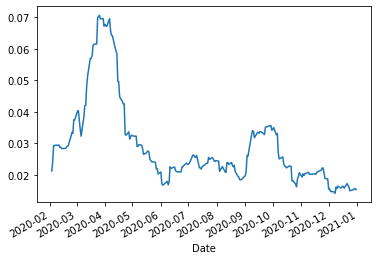

In [46]:
#PLOTTING THE DAILY STD FOR THE PORTFOLIO USING A ROLLING WINDOW OF 21 DAYS
daily_std = portfolio_returns.rolling(window=21).std()
daily_std.plot()


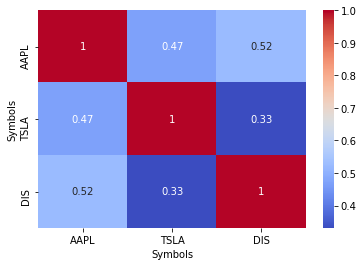

In [47]:
#CALCUALTING AND PLOTTING THE CORRELATION BETWEEN STOCKS AND THE PORTFOLIO
stocks_correlation = daily_returns.corr()
sns.heatmap(stocks_correlation , annot= True , cmap = 'coolwarm')

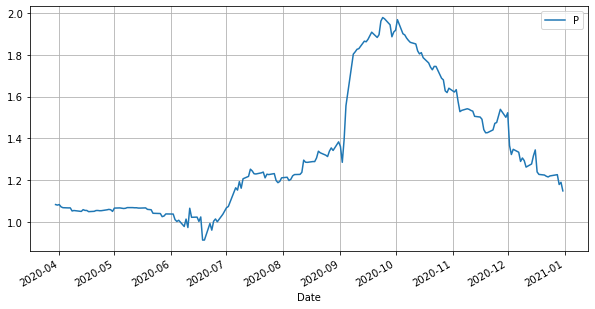

In [48]:
#CALCULATING AND PLOTTING THE CUSTOM PORTFOLIO BETA
rolling_cov = portfolio_returns.rolling(window = 60).cov(sp500_daily_returns)
rolling_beta_variance = sp500_daily_returns.rolling(window = 60).var()
rolling_beta = rolling_cov/rolling_beta_variance
rolling_beta.plot(figsize = (10,5) , grid =True)
plt.legend('Portfolio Beta')

In [49]:
#CALCUALTING THE CUSTOM PORTFOLIO SHARPE RATIO USING THE 10YR TREASURY RATE AS THE RISK FREE RATE
portfolio_sharpe_ratio = ((portfolio_returns.mean() *252 - 0.0115))/annual_sd
portfolio_sharpe_ratio

2.3680721849703197

In [50]:
print('THE SHARPE RATIO IN ISLOATION DOES NOT TELL US MUCH HOWEVER COMPARED TO THE PORTFOLIOS IN THE FIRST PART IT OUTPERFORMED ALL OF THEM , THIS IS DUE PROBABLY TO THE SIGNIFICANT BULLISH SENTIMENT THE MARKET HAS BEEN HAVING TOWARDS TESLA') 

THE SHARPE RATIO IN ISLOATION DOES NOT TELL US MUCH HOWEVER COMPARED TO THE PORTFOLIOS IN THE FIRST PART IT OUTPERFORMED ALL OF THEM , THIS IS DUE PROBABLY TO THE SIGNIFICANT BULLISH SENTIMENT THE MARKET HAS BEEN HAVING TOWARDS TESLA
